# Image Classification using CNN

In this project, we are going to build image classifier using CNN. We will use CIFAR-10 dataset.

This dataset contains 60000 images of 10 different classes, in which 6000 images per class.The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


# Step 1 : Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2 : Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

we split the whole dataset into train and test. As we can see test dataset has 10000 samples with 32x32 RGB channel image and train dataset has 50000 images with the same 3 channel.

In [5]:
x_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

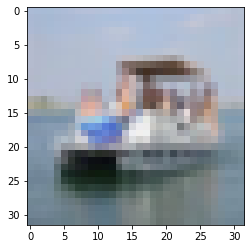

In [6]:
plt.imshow(x_train[49000])

In [9]:
def showPic (x, y, index):
    plt.figure(figsize = (10,15))
    plt.imshow(x[index])
    plt.xlabel

# to convert the pixel value into 0 to 1(something like normalization)

In [11]:
x_train = (x_train)/255
x_test = (x_test)/255

In [12]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# First make Simple ANN

In [15]:
ann = models.Sequential([
       layers.Flatten(input_shape=(32, 32, 3)),
       layers.Dense(3000, activation='relu'),
       layers.Dense(1000, activation='relu'),
       layers.Dense(10, activation='sigmoid')
      ])

ann.compile(
            optimizer= 'Adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8944 - accuracy: 0.3272
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6627 - accuracy: 0.4027
Epoch 3/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5811 - accuracy: 0.4311
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5322 - accuracy: 0.4527
Epoch 5/5
1563/1563 [==============================] - 27s 18ms/step - loss: 1.5032 - accuracy: 0.4610


In [16]:
y_pred = ann.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [17]:
from sklearn.metrics import r2_score

In [20]:
y_test.shape

(10000, 1)

In [21]:
y_pred.shape

(10000, 10)

# Using CNN Model

In [25]:
cnn = models.Sequential([
    
       #cnn layers
       layers.Conv2D(filters =32, kernel_size = (3,3), activation='relu', input_shape=(32, 32, 3)),
       layers.MaxPooling2D((2,2)),
       
       layers.Conv2D(filters =32, kernel_size = (3,3), activation='relu'),
       layers.MaxPooling2D((2,2)),
    
       #dense    
       layers.Flatten(),
       layers.Dense(64, activation='relu'),
       layers.Dense(10, activation='softmax'),
       
      ])

In [29]:
cnn.compile(
            optimizer= 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [30]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8565 - accuracy: 0.7001
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8217 - accuracy: 0.7125
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7895 - accuracy: 0.7239
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7639 - accuracy: 0.7323
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7396 - accuracy: 0.7414


In [31]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9809 - accuracy: 0.6665


[0.9808979630470276, 0.6664999723434448]

# Good job! 
We build our first cnn modeland got prety much accuracy comapred to ann :)